In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Colab Notebooks/'
%ls

/content/drive/MyDrive/Colab Notebooks
'Another copy of F23 HC7&8_analysis.ipynb'   tasks.csv
'Copy of F23 HC7&8_analysis.ipynb'           tdcsfog/
 daily_metadata.csv                          tdcsfog_metadata.csv
 defog_metadata.csv                          test/
 events.csv                                  tlvmc-parkinsons-freezing-gait-prediction/
'My Copy of MJFF-FOG-Prediction-PD.ipynb'    tlvmc-parkinsons-freezing-gait-prediction.zip
 nyuaischool                                 train/
 sample_submission.csv                       unlabeled/
 subjects.csv                               'Untitled document.gdoc'


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/test'
files = os.listdir(folder_path)
print(files)

['.DS_Store', 'tdcsfog', 'defog']


In [ ]:
defog = '/content/drive/MyDrive/Colab Notebooks/test/defog'
file_names = os.listdir(defog)
print(file_names)


['02ab235146.csv']


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/test/defog/02ab235146.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

   Time      AccV     AccML     AccAP
0     0 -0.914652 -0.300851  0.298156
1     1 -0.914367 -0.301572  0.298325
2     2 -0.779540 -0.343197  0.275690
3     3 -0.993162 -0.270281  0.315775
4     4 -0.948767 -0.307849  0.297191


In [ ]:
# Define the directory paths
defog_dir = '/content/drive/MyDrive/Colab Notebooks/train/defog'
tdcsfog_dir = '/content/drive/MyDrive/Colab Notebooks/train/tdcsfog'
notype_dir = '/content/drive/MyDrive/Colab Notebooks/train/notype'

# Function to process all CSV files in a directory
def process_directory(directory):
    dfs = []
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)

        # Check if the file is a CSV and process it
        if file_name.endswith('.csv') and os.path.isfile(file_path):
            df = pd.read_csv(file_path)  # read csv files
            df['source_directory'] = os.path.basename(directory)  # Add a column to identify the source directory
            df['csv_name'] = os.path.basename(file_name)
            dfs.append(df)

    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

# Process each subdirectory
defog = process_directory(defog_dir)
tdcsfog = process_directory(tdcsfog_dir)
notype = process_directory(notype_dir)

print("Data concatenation complete.")

Data concatenation complete.


Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task', 'source_directory', 'csv_name'],
      dtype='object')
Outliers in AccAP column:
            Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
1577       1577 -0.985050  0.217095 -0.889445                0     0        0   
2503       2503 -1.398947  0.201803 -0.846237                0     0        0   
15821     15821 -0.849511  0.139406 -0.854032                0     0        0   
22497     22497 -1.055452  0.288994 -0.849992                0     0        0   
23130     23130 -0.625415  0.037631 -0.833836                0     0        0   
...         ...       ...       ...       ...              ...   ...      ...   
13483202  77532 -1.724525  0.204310 -0.926382                0     0        0   
13483203  77533 -1.923876  0.204966 -0.895718                0     0        0   
13483601  77931 -1.092482  0.010436 -0.841311                0     0        0   
13483

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

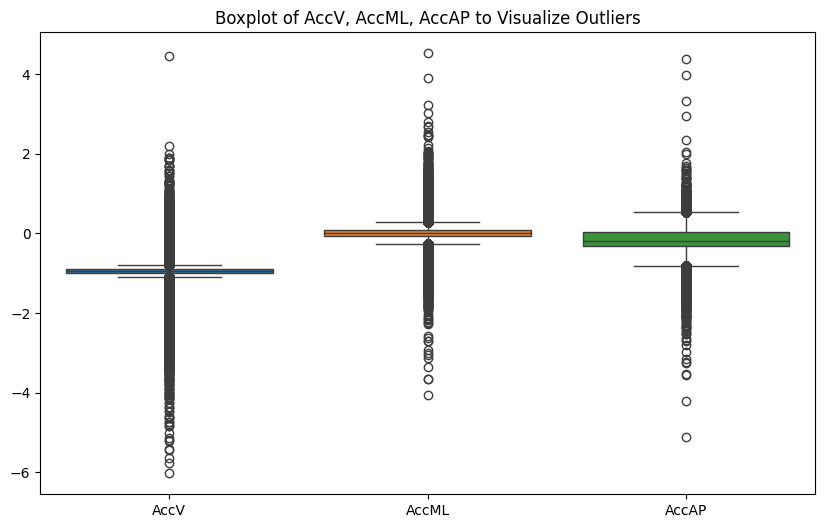

In [ ]:
# Check the columns in defog
print(defog.columns)

# Outlier detection function using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_AccAP = detect_outliers_iqr(defog, 'AccAP')
print("Outliers in AccAP column:\n", outliers_AccAP)

plt.figure(figsize=(10, 6))
sns.boxplot(data=defog[['AccV', 'AccML', 'AccAP']])
plt.title("Boxplot of AccV, AccML, AccAP to Visualize Outliers")
plt.show()

In [ ]:
print(tdcsfog.columns)

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'source_directory', 'csv_name'],
      dtype='object')



Event Distribution for DEFOG:
                 Turn  Walking  StartHesitation   Total  Turn_Percent  \
csv_name                                                                
a2f1a8ab76.csv      0    30775                0  415388      0.000000   
4ec23c3d98.csv   2453    26421                0  340284      0.720868   
3e6987cb2d.csv  33881      741                0  300288     11.282835   
2e75cf4507.csv  15429        0                0  259548      5.944565   
961b782275.csv   2526        0                0  253385      0.996902   
...               ...      ...              ...     ...           ...   
850748a138.csv  11755        0                0   72517     16.209992   
8db3a7e46b.csv     72      170                0   70576      0.102018   
5327e062c9.csv  13878      296                0   66449     20.885190   
4f613ccf88.csv   1524        0                0   63204      2.411240   
509a9830a6.csv    104      121                0   28342      0.366947   

                Wal

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

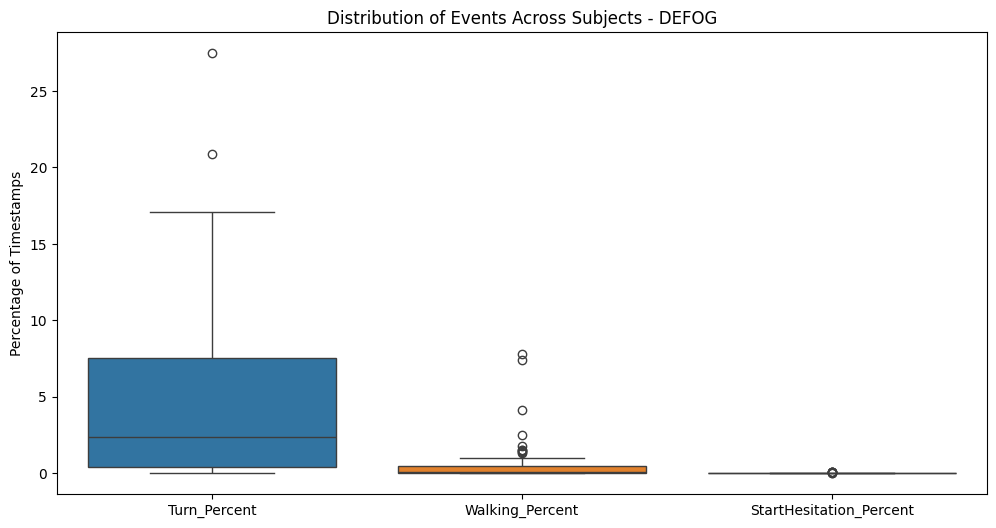


Summary Statistics for DEFOG:
       Turn_Percent  Walking_Percent  StartHesitation_Percent
count     91.000000        91.000000                91.000000
mean       4.533601         0.488894                 0.004089
std        5.482087         1.237366                 0.015401
min        0.000000         0.000000                 0.000000
25%        0.378692         0.000000                 0.000000
50%        2.382462         0.056658                 0.000000
75%        7.514943         0.477636                 0.000000
max       27.481514         7.764397                 0.091968

Event Distribution for TDCSFOG:
                 Turn  Walking  StartHesitation  Total  Turn_Percent  \
csv_name                                                               
9a7a5e1df2.csv  77956        0            16543  97077     80.303264   
ff92d9244d.csv  44382    35979             7654  89619     49.522981   
bfe8fee128.csv  74493        0            11879  88326     84.338700   
10e83d6550.csv  39

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

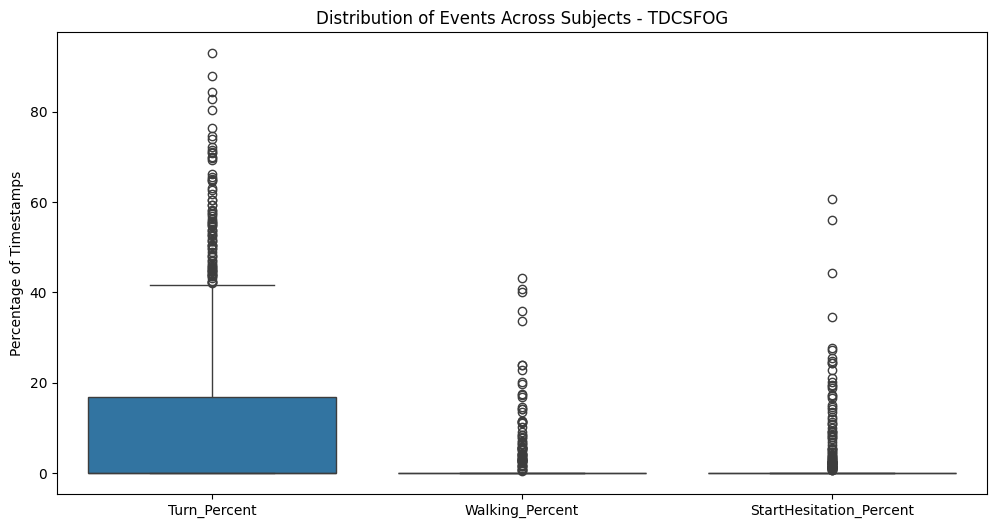


Summary Statistics for TDCSFOG:
       Turn_Percent  Walking_Percent  StartHesitation_Percent
count    833.000000       833.000000               833.000000
mean      11.584204         0.799282                 1.030649
std       18.518292         3.943724                 4.784362
min        0.000000         0.000000                 0.000000
25%        0.000000         0.000000                 0.000000
50%        0.000000         0.000000                 0.000000
75%       16.854839         0.000000                 0.000000
max       92.938298        43.273847                60.702285


In [ ]:
def analyze_events_by_subject(df, dataset_name):
    # Group by 'csv_name' assuming each file corresponds to a subject
    events_by_subject = df.groupby('csv_name')[['Turn', 'Walking', 'StartHesitation']].sum()

    # Calculate the total number of timestamps for each subject
    total_timestamps = df.groupby('csv_name').size()

    # Add the total timestamps to the dataframe
    events_by_subject['Total'] = total_timestamps

    # Calculate percentages
    for event in ['Turn', 'Walking', 'StartHesitation']:
        events_by_subject[f'{event}_Percent'] = events_by_subject[event] / events_by_subject['Total'] * 100

    # Sort by total timestamps
    events_by_subject = events_by_subject.sort_values('Total', ascending=False)

    print(f"\nEvent Distribution for {dataset_name}:")
    print(events_by_subject)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=events_by_subject[[f'{event}_Percent' for event in ['Turn', 'Walking', 'StartHesitation']]])
    plt.title(f'Distribution of Events Across Subjects - {dataset_name}')
    plt.ylabel('Percentage of Timestamps')
    plt.show()

    # Summary statistics
    print(f"\nSummary Statistics for {dataset_name}:")
    print(events_by_subject[[f'{event}_Percent' for event in ['Turn', 'Walking', 'StartHesitation']]].describe())

    return events_by_subject

# Analyze both datasets
defog_events = analyze_events_by_subject(defog, 'DEFOG')
tdcsfog_events = analyze_events_by_subject(tdcsfog, 'TDCSFOG')

In [ ]:
# filter numeric columns only (removes any string columns)
numeric_defog = defog.select_dtypes(include=[np.number])

# check the columns selected for correlation
print("Numeric columns for correlation:\n", numeric_defog.columns)

# correlation analysis on numeric columns
corr_matrix = numeric_defog.corr()

# display correlation with the target variable like "Walking"
if 'Walking' in corr_matrix.columns:
    target_corr = corr_matrix["Walking"].sort_values(ascending=False)
    print("Correlation of features with Walking:\n", target_corr)

    # filter features that have a high correlation with the target (correlation > 0.5)
    selected_features = target_corr[target_corr.abs() > 0.5]
    print("Selected features based on correlation:\n", selected_features)
else:
    print("The target variable 'Walking' is not in the correlation matrix. Check if it's included in the numeric columns.")

Numeric columns for correlation:
 Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')
Correlation of features with Walking:
 Walking            1.000000
Time               0.126861
StartHesitation   -0.000521
AccML             -0.005139
AccV              -0.013502
Turn              -0.018253
AccAP             -0.030264
Name: Walking, dtype: float64
Selected features based on correlation:
 Walking    1.0
Name: Walking, dtype: float64


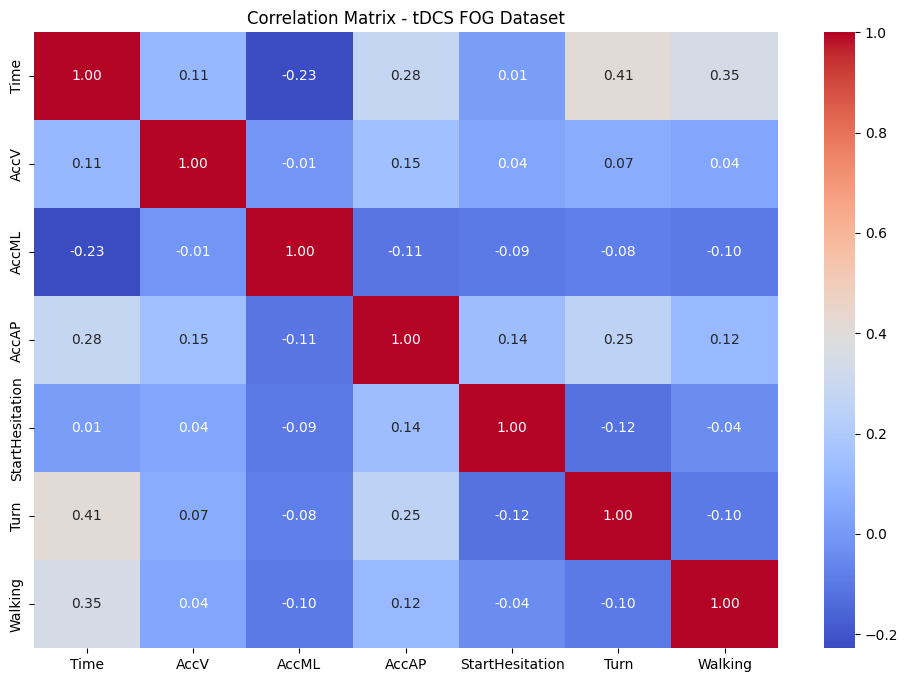

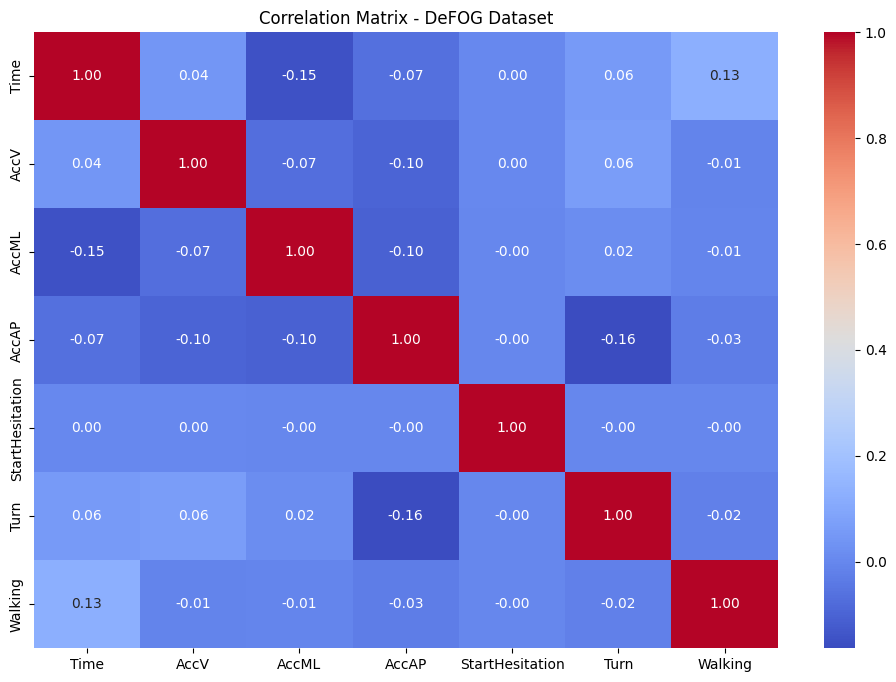

In [ ]:
# Asaf Delmedigo, Romi Zarchi, Ori Armel, Tal Bocbot, Chen Zusman

def plot_correlation_matrix(df, title):
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot the correlation matrix for tDCS FOG dataset
plot_correlation_matrix(tdcsfog, 'Correlation Matrix - tDCS FOG Dataset')

# Plot the correlation matrix for DeFOG dataset
plot_correlation_matrix(defog, 'Correlation Matrix - DeFOG Dataset')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define the target column you want to predict
target_column = 'Walking'  # You can change this to 'StartHesitation' or 'Turn' if needed
# Assuming you're using the 'defog' dataset for the SVM
X = defog.drop(['StartHesitation', 'Turn', 'Walking', 'Time', 'csv_name', 'source_directory'], axis=1)
y = defog[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the SVM model (you can use different kernels like 'linear', 'rbf', etc.)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)
# Predict on the test data
y_pred = svm_model.predict(X_test_scaled)

# Display classification metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV with SVM and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found
print("Best parameters found by GridSearch:", grid_search.best_params_)

# Evaluate the best estimator on the test set
y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

# Display classification metrics for the best model
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))